# CSC370 Database Systems - Term Project Final Presentation

## Pt. 1: [Portef](https://github.com/CSC370-Project/portef) final tweaks, future goals & program demonstration

### Edit 1: Use a remote database (RDS instance)

- Original code required local database setup and fairly extensive configuration to be usable
- Updated code can be downloaded and used without SQl, i.e. only requirements are python and packages specified in portef's README

### Edit 2: ERD

- The original ERD contained an "SID" table which was meant to distinguish session tables
- This was unnecessary as, in practice, it was more efficient and effective to use UUID: The UUID of each running instance is hardcoded into the table names to ensure they only reference one another, thus no need for extra SQL code to check session ID's

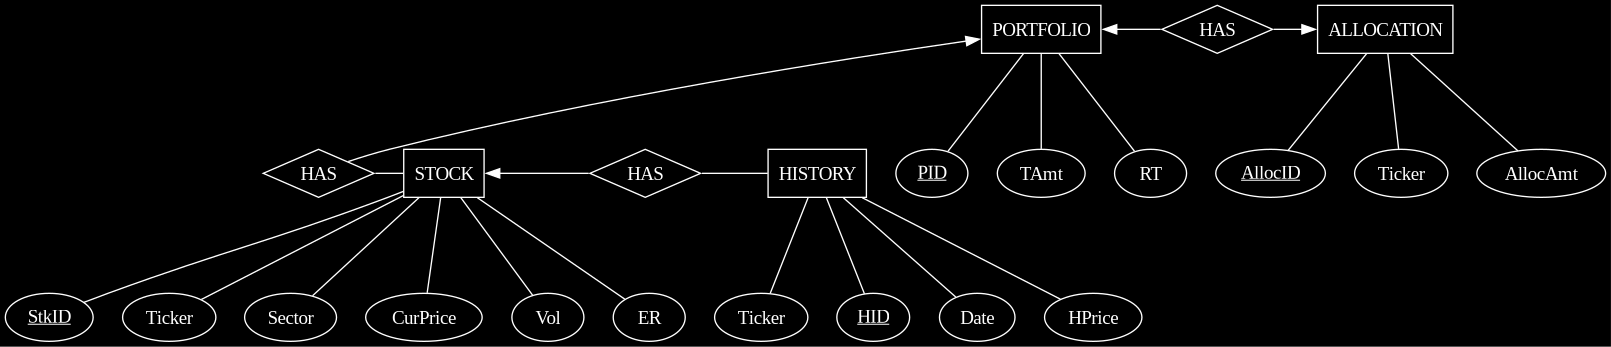

In [ ]:
# Create ERD

from graphviz import Digraph

# Create a new directed graph
dot1 = Digraph(comment='ERD2')

# Set graph attributes for a black background and white nodes and edges
dot1.attr(bgcolor='black')
dot1.attr('node', color='white', fontcolor='white', style='filled', fillcolor='black')
dot1.attr('edge', color='white')
dot1.attr('graph', ranksep='1', nodesep='0.3')  # Reduced nodesep

# Add main entity nodes with shortened names
dot1.node('S', 'STOCK', shape='rectangle')
dot1.node('P', 'PORTFOLIO', shape='rectangle')
dot1.node('A', 'ALLOCATION', shape='rectangle')
dot1.node('H', 'HISTORY', shape='rectangle')

# Add relationship nodes
dot1.node('H2', 'HAS', shape='diamond')
dot1.node('H3', 'HAS', shape='diamond')
dot1.node('H4', 'HAS', shape='diamond')

# Add subgraph for organizing nodes horizontally
with dot1.subgraph() as s:
    s.attr(rank='same')
    s.node('P')
    s.node('A')
    s.node('H3')

with dot1.subgraph() as s2:
    s2.attr(rank='same')
    s2.node('S')
    s2.node('H')
    s2.node('H2')
    s2.node('H4')

# Add relationship edges
dot1.edge('P', 'H2', dir='back')
dot1.edge('H2', 'S', arrowhead='none')

dot1.edge('P', 'H3', dir='back')
dot1.edge('H3', 'A')

dot1.edge('S', 'H4', dir='back')
dot1.edge('H4', 'H', arrowhead='none')

# Add attribute edges (separate nodes for each attribute)
# Stock
dot1.node('StkID', '<<u>StkID</u>>', shape='ellipse')
dot1.node('Ticker', 'Ticker', shape='ellipse')
dot1.node('Sector', 'Sector', shape='ellipse')
dot1.node('CurP', 'CurPrice', shape='ellipse')  # CurrentPrice
dot1.node('Vol', 'Vol', shape='ellipse')  # Volatility
dot1.node('ER', 'ER', shape='ellipse')  # ExpectedReturn
dot1.edge('S', 'StkID', arrowhead='none')
dot1.edge('S', 'Ticker', arrowhead='none')
dot1.edge('S', 'Sector', arrowhead='none')
dot1.edge('S', 'CurP', arrowhead='none')
dot1.edge('S', 'Vol', arrowhead='none')
dot1.edge('S', 'ER', arrowhead='none')

# Portfolio
dot1.node('PID', '<<u>PID</u>>', shape='ellipse')
dot1.node('TAmt', 'TAmt', shape='ellipse')  # TotalAmount
dot1.node('RT', 'RT', shape='ellipse')  # RiskTolerance
dot1.edge('P', 'PID', arrowhead='none')
dot1.edge('P', 'TAmt', arrowhead='none')
dot1.edge('P', 'RT', arrowhead='none')

# Allocation
dot1.node('AllocID', '<<u>AllocID</u>>', shape='ellipse')
dot1.node('Ticker2', 'Ticker', shape='ellipse')  # StockID
dot1.node('AllocAmt', 'AllocAmt', shape='ellipse')  # AllocatedAmount
dot1.edge('A', 'AllocID', arrowhead='none')
dot1.edge('A', 'Ticker2', arrowhead='none')
dot1.edge('A', 'AllocAmt', arrowhead='none')

# Stock History
dot1.node('Ticker3', 'Ticker', shape='ellipse')  # History
dot1.node('HID', '<<u>HID</u>>', shape='ellipse')  # HistStockID
dot1.node('Date', 'Date', shape='ellipse')
dot1.node('HPrice', 'HPrice', shape='ellipse')  # HistPrice
dot1.edge('H', 'HID', arrowhead='none')
dot1.edge('H', 'Ticker3', arrowhead='none')
dot1.edge('H', 'Date', arrowhead='none')
dot1.edge('H', 'HPrice', arrowhead='none')

# Render the graph
dot1.render('ERD2', format='png', cleanup=False)

# Display the graph inline in Jupyter Notebook (for Jupyter only)
from IPython.display import Image
Image(filename='ERD2.png')

### Edit 3: Remove unnecessary 'alloc' view

- Originally the code used an unnecessary `JOIN` operation to fetch and display info from the Allocation table (Contains the EF)
- Initially used a view to rid of join operation, realized it would be more efficient to simply `SELECT` the information

### Edit 4: Add constraints to SQL code

**TotalAmt (Total monetary amount)**
- Constraint: Non-negative float or decimal
- Rationale: Total amount should always be zero or positive

**Ticker (Stock ticker)**
- Constraint: String, 1-5 characters, uppercase letters
- Rationale: Stock tickers are typically 1-5 characters long and use uppercase letters

**Amount (Percentage as decimal)**
- Constraint: Float between 0 and 1 inclusive
- Rationale: Percentages expressed as decimals range from 0 to 1

**Price (Stock price)**
- Constraint: Non-negative float or decimal, typically with 2-4 decimal places
- Rationale: Stock prices are always positive and often have cent precision

**Date (YYYY-MM-DD)**
- Constraint: String in YYYY-MM-DD format, valid calendar date
- Rationale: Ensures consistent date formatting and validity

### Edit 5: Add investment amount input/output

- Program previously returned the efficient frontier as a percentage of a portfolio
- Edited to take in an investment amount and output the ef as a percentage of that amount, legibility

### Edit 6: Batch yfinance queries

- Original code looped over ticker symbols, running one yfinance query for each ticker
- Updated code uses `yf.download(tickers)`, which downloads all stock data in a single query leading to faster and more efficient code. This also avoids errors that may arise when repeatedly querying yfinance due to rate limiting
- This also resulted in simplified code, as yf_getH (fetched history data from yf) and yf_getS (fetched stock data from yf) are no longer needed

### Edit 7: Clean up CLI output

- Original code contained debug statements, removed so that output only includes prompts and allocation output

### Edit 8: Adjust code to account for varying timeframes

- Original code attempted to calculate the EF based on a set timeframe, i.e. 1 year. Any stock < 1 year old would result in errors
- Updated code calculates the EF based off of available stock data, with a default timeframe of 10 years. If any stock is less than 10 years old the EF is calculated using the earliest date available

### Edit 9: Increase speed of database interactions

- After connecting to RDS instance, code was taking 5+ minutes to execute
- In order to ensure performance, the following changes were implemented, mostly in the get_sh.py file which populates the database:
  1. SQL batch inserts: Reduces number of database calls; reduces thousands of pymysql `execute` statements into one `executemany` statement
  2. `JOIN` to fetch data instead of `VIEW`: Allows MySQL query optimizer to choose most efficient execution plan, 
  3. Replaced pandas sql interacitons (i.e. `read_sql_query()`) with direct sql interaction (`execute`) where applicable

### Future goals

**Expected return, etc.**  
- Implementation of a more complex program output was tricky, would more math, more data, more functions and a review of the ERD
- The more info we can get the program to give the better. Potential additions could include:
  - Portfolio performance metrics
  - Individual stock metrics
  - Historical performance
  - Sector analysis
  - EF Visualization, Monte-Carlo simulation results
  - Value at risk (loss)
  - Rebalancing recommendations
  - Fundamental analysis
  - etc.  

**Security**  
- ...

**API**  
- We'd like to continue our exploration of app development by implementing a proper frontend/backend 
- Essential for database security, scalability and overall user experience
- Would allow for the development of a more sufficient UI, i.e. a GUI/web-app

### Program logic

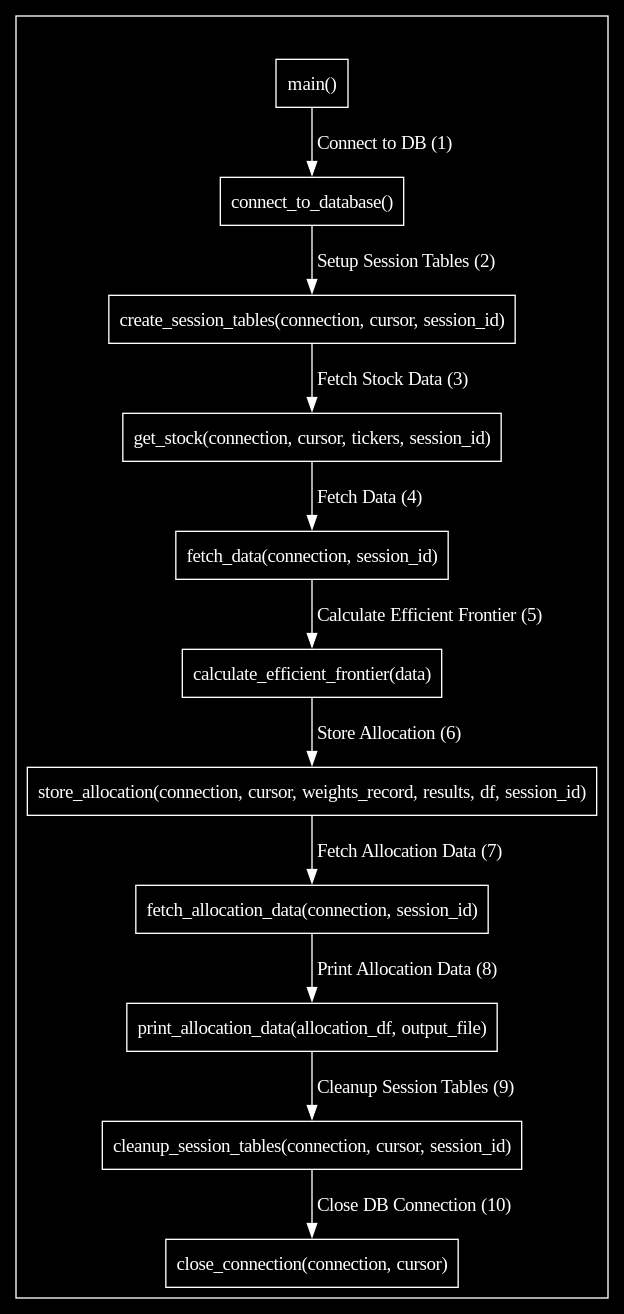

In [3]:
from graphviz import Digraph
from IPython.display import display, Image

# Create a new directed graph for the combined output
dot = Digraph(comment='Program Logic Comparison')

# Set graph attributes for black background and white text/lines
dot.attr(bgcolor='black')
dot.attr('node', style='filled', fillcolor='black', fontcolor='white', color='white', shape='box')
dot.attr('edge', color='white', fontcolor='white')

# Define subgraph for Sprint 4
with dot.subgraph(name='cluster_final') as final:
    final.attr(label='Sprint 4', color='white')
    final.node('Aa', 'main()')
    final.node('Bb', 'connect_to_database()')
    final.node('Cc', 'create_session_tables(connection, cursor, session_id)')
    final.node('Dd', 'get_stock(connection, cursor, tickers, session_id)')
    final.node('Ee', 'fetch_data(connection, session_id)')
    final.node('Ff', 'calculate_efficient_frontier(data)')
    final.node('Gg', 'store_allocation(connection, cursor, weights_record, results, df, session_id)')
    final.node('Hh', 'fetch_allocation_data(connection, session_id)')
    final.node('Ii', 'print_allocation_data(allocation_df, output_file)')
    final.node('Jj', 'cleanup_session_tables(connection, cursor, session_id)')
    final.node('Kk', 'close_connection(connection, cursor)')
    final.edge('Aa', 'Bb', ' Connect to DB (1)')
    final.edge('Bb', 'Cc', ' Setup Session Tables (2)')
    final.edge('Cc', 'Dd', ' Fetch Stock Data (3)')
    final.edge('Dd', 'Ee', ' Fetch Data (4)')
    final.edge('Ee', 'Ff', ' Calculate Efficient Frontier (5)')
    final.edge('Ff', 'Gg', ' Store Allocation (6)')
    final.edge('Gg', 'Hh', ' Fetch Allocation Data (7)')
    final.edge('Hh', 'Ii', ' Print Allocation Data (8)')
    final.edge('Ii', 'Jj', ' Cleanup Session Tables (9)')
    final.edge('Jj', 'Kk', ' Close DB Connection (10)')

# Render the graph to a file and display it
dot.render('program_logic_comparison', format='png')
display(Image(filename='program_logic_comparison.png'))

## Pt.2: Course-level competencies & security considerations

## Course Level Competencies 

#### Where it Relates

- RDMS Data Repository:
    - Our project successfully employs SQL queries to filter, sort, and join data from multiple tables, particularly when fetching historical stock data and allocation information, enabling efficient portfolio calculations and analysis.

- Basic Conceptual Design:
    - Our portfolio optimization project implicitly uses ERD concepts by defining entities such as Stocks, History, and Allocation, each with their own attributes, reflecting the basic structure of an ERD.

- The Relational Data Model:
    - Our project enforces referential integrity by using foreign keys to link related tables, such as linking the History table to the Stocks table via the Ticker attribute, ensuring data consistency across related tables.

- Complex SQL Queries:
    - Our project uses aggregation queries to calculate important metrics, such as average stock prices or total portfolio value, grouping data by relevant attributes like ticker or date.

- Basic Security:
    - We set up different privilege levels for various user roles, such as read-only access for viewers and full access for administrators, to maintain data security and integrity.

- ACID Transactions:
    - Our project ensures atomicity by batching related queries, such as inserting stock data and historical prices, into transactions to guarantee that all operations are completed successfully or none at all.

- Advanced Conceptual Design:
    - Our project implicitly uses inheritance concepts by organizing different types of financial instruments (e.g., stocks, bonds, ETFs) under a common "Asset" entity, allowing for shared attributes and specialized characteristics.

- Advanced Relational Design:
    - Our project implicitly connects conceptual and logical design by translating entity relationships (e.g., between Stocks and History) into relational database tables with appropriate foreign key constraints.

- Advanced SQL Queries:
    - Our project uses complex queries to retrieve and analyze stock data, including subqueries for calculations like average prices or portfolio performance.

- Analyzing Query Algorithms:
    - We utilize B+-tree indexes to efficiently perform lookups and range queries on disk-resident data, ensuring that our queries remain performant even with substantial data volumes.

#### Where We Could Improve

- RDMS Data Repository:
    - We could enhance our data storage by implementing more advanced MySQL features, such as using ENUM types for predefined categories or implementing table partitioning for improved query performance.

- Basic Conceptual Design:
    - We could create an explicit ERD for our project, visually representing the entities, attributes, and relationships in our database design, which would aid in communication and optimization.

- The Relational Data Model:
    - We could formally decompose our database relations into Boyce-Codd Normal Form (BCNF) by systematically analyzing and eliminating any partial or transitive dependencies to create a more efficient and reliable database design.

- Complex SQL Queries:
    - We could enhance our use of aggregation by implementing more complex statistical calculations, such as moving averages or correlation coefficients, to provide deeper insights into portfolio performance.

- Basic Security:
    - We could enhance our access management by implementing more granular user roles and permissions, allowing for finer control over who can access specific parts of the database or perform certain operations.

- ACID Transactions:
    - We could improve our atomicity handling by implementing more complex transaction management, such as nested transactions, to handle more intricate operations and rollback scenarios effectively.

- Advanced Conceptual Design:
    - We could explicitly model inheritance relationships in our database schema, creating a more structured hierarchy for different types of financial instruments and their specific attributes.

- Advanced Relational Design:
    - We could create an explicit mapping document that shows how each entity and relationship in our ERD translates to specific tables and constraints in our relational schema, ensuring a clear connection between conceptual and logical designs.

- Advanced SQL Queries:
    - We could review our existing complex queries, especially those with subqueries, and attempt to simplify them by converting subqueries into more efficient join operations, potentially improving query performance.

- Analyzing Query Algorithms:
    - We could further analyze the I/O complexity of our B+-tree based queries, ensuring that our index structures are optimized for the specific access patterns of our application.

### Security Issues with Using a Command-Line Interface through an RDS Web Server

1. **Unauthorized Access**: 
   - The command-line interface connected to an RDS web server potentially exposes the database to anyone who can connect, increasing the risk of unauthorized access to sensitive financial data.

2. **Lack of Fine-grained Access Control**: 
   - Without proper security measures, all users connecting through the CLI might have the same level of access, making it difficult to implement the principle of least privilege.

3. **Potential for SQL Injection**: 
   - Direct SQL input through a CLI increases the risk of SQL injection attacks if user inputs are not properly sanitized.

4. **Limited Audit Trail**: 
   - Basic CLI setups may not provide comprehensive logging of user actions, making it difficult to track and audit database activities.

5. **Exposure of Connection Details**: 
   - Connection credentials might be exposed if not properly secured, especially in scripts or command history.

6. **Network Security Risks**: 
   - If the RDS instance is publicly accessible, it increases the attack surface and potential for unauthorized access attempts.

### Mitigation Strategies
To mitigate these risks, consider implementing SQL security features such as GRANTS, VIEWS, and ROLES. Additionally, network-level security measures like VPCs, security groups, and potentially VPN connections should be utilized to enhance the overall security posture of your database setup.


1. **GRANTS**:
   - Use GRANT statements to control user access to specific tables or views.
   - Example: 
     ```sql
     GRANT SELECT ON Stocks TO 'viewer_role';
     GRANT SELECT, INSERT, UPDATE ON Allocation TO 'portfolio_manager';
     ```
   - This allows you to give specific permissions to different user roles.

2. **VIEWS**:
   - Create views to simplify complex queries and restrict access to underlying tables.
   - Example:
     ```sql
     CREATE VIEW PortfolioSummary AS
     SELECT p.PortfolioID, s.Ticker, a.Amount, s.Price
     FROM Portfolio p
     JOIN Allocation a ON p.PortfolioID = a.PortfolioID
     JOIN Stocks s ON a.Ticker = s.Ticker;
     ```
   - Users can query this view without needing direct access to the base tables.

3. **REVOKE**:
   - Use REVOKE to remove previously granted permissions.
   - Example:
     ```sql
     REVOKE INSERT, UPDATE ON Stocks FROM 'analyst_role';
     ```

4. **ROLES**:
   - Create roles to group permissions and assign them to users.
   - Example:
     ```sql
     CREATE ROLE 'read_only';
     GRANT SELECT ON *.* TO 'read_only';
     GRANT 'read_only' TO 'viewer_user'@'localhost';
     ```

5. **Column-Level Permissions**:
   - Grant or revoke permissions on specific columns.
   - Example:
     ```sql
     GRANT SELECT (Ticker, Price) ON Stocks TO 'user';
     ```
